In [16]:
library(ISLR)
library(caTools)
library(neuralnet)

# Preparing data

In [2]:
print(head(College,2))

                             Private Apps Accept Enroll Top10perc Top25perc
Abilene Christian University     Yes 1660   1232    721        23        52
Adelphi University               Yes 2186   1924    512        16        29
                             F.Undergrad P.Undergrad Outstate Room.Board Books
Abilene Christian University        2885         537     7440       3300   450
Adelphi University                  2683        1227    12280       6450   750
                             Personal PhD Terminal S.F.Ratio perc.alumni Expend
Abilene Christian University     2200  70       78      18.1          12   7041
Adelphi University               1500  29       30      12.2          16  10527
                             Grad.Rate
Abilene Christian University        60
Adelphi University                  56


In [3]:
# Create Vector of Column Max and Min Values
maxs <- apply(College[,2:18], 2, max)
mins <- apply(College[,2:18], 2, min)

# Use scale() and convert the resulting matrix to a data frame
scaled.data <- as.data.frame(scale(College[,2:18], center=mins, scale=maxs-mins))

In [4]:
# Check out results
print(head(scaled.data, 2))

                                   Apps     Accept     Enroll Top10perc
Abilene Christian University 0.03288693 0.04417701 0.10791254 0.2315789
Adelphi University           0.04384229 0.07053089 0.07503539 0.1578947
                             Top25perc F.Undergrad P.Undergrad  Outstate
Abilene Christian University 0.4725275  0.08716353  0.02454774 0.2634298
Adelphi University           0.2197802  0.08075165  0.05614839 0.5134298
                             Room.Board     Books  Personal       PhD
Abilene Christian University  0.2395965 0.1577540 0.2977099 0.6526316
Adelphi University            0.7361286 0.2914439 0.1908397 0.2210526
                               Terminal S.F.Ratio perc.alumni    Expend
Abilene Christian University 0.71052632 0.4182306      0.1875 0.0726714
Adelphi University           0.07894737 0.2600536      0.2500 0.1383867
                             Grad.Rate
Abilene Christian University 0.4629630
Adelphi University           0.4259259


In [5]:
# Convert Private column from Yes/No to 1/0
Private = as.numeric(College$Private)-1
data = cbind(Private, scaled.data)

# NN Fitting

In [9]:
set.seed(101)
# Create Split (any column is fine)
split = sample.split(data$Private, SplitRatio=0.70)
# Split based off of split Boolean Vector
train = subset(data, split == TRUE)
test = subset(data, split == FALSE)


In [13]:
nn <- neuralnet(Private~Apps+Accept+Enroll+Top10perc+Top25perc+Books+F.Undergrad+P.Undergrad, train, hidden=c(10), linear.output=FALSE)

In [11]:
# alternative, python deep learning like style
feats <- names(scaled.data)
# Concatenate strings
f <- paste(feats,collapse=' + ')
f <- paste('Private ~',f)
# Convert to formula
f <- as.formula(f)
f
nn <- neuralnet(f, train, hidden=c(10,10,10), linear.output=FALSE)

Private ~ Apps + Accept + Enroll + Top10perc + Top25perc + F.Undergrad + 
    P.Undergrad + Outstate + Room.Board + Books + Personal + 
    PhD + Terminal + S.F.Ratio + perc.alumni + Expend + Grad.Rate

In [18]:
library(devtools)
source_url('https://gist.githubusercontent.com/fawda123/7471137/raw/466c1474d0a505ff044412703516c34f1a4684a5/nnet_plot_update.r')

Loading required package: usethis

SHA-1 hash of file is 74c80bd5ddbc17ab3ae5ece9c0ed9beb612e87ef



Loading required package: scales

Loading required package: reshape



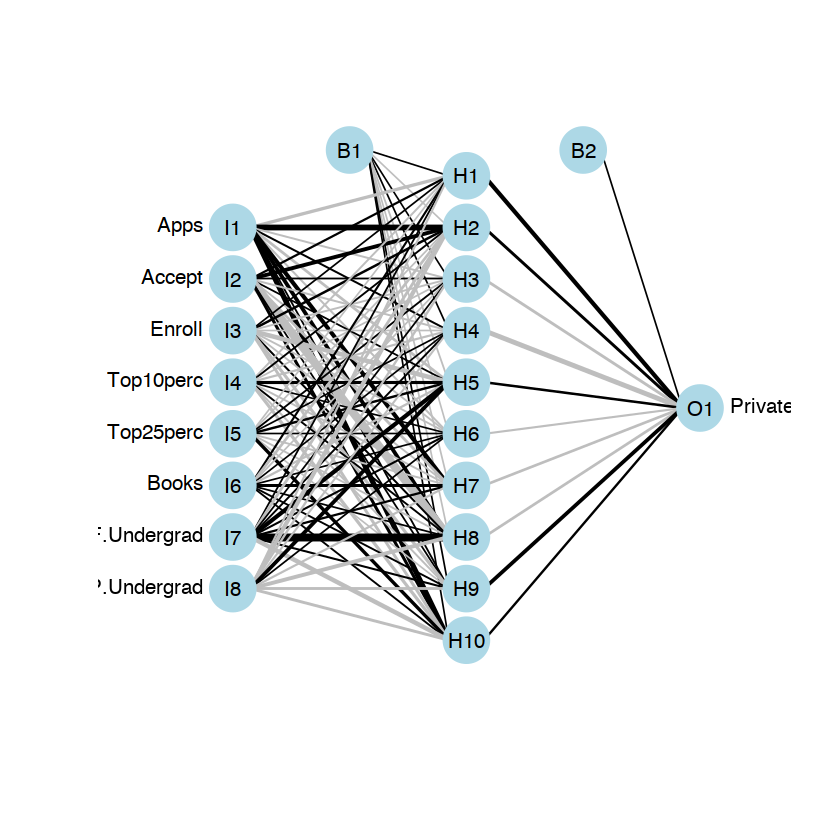

In [19]:
plot.nnet(nn)

# Prediction

In [20]:
# Compute Predictions off Test Set
predicted.nn.values <- compute(nn, test[2:18])

In [21]:
# Check out net.result
print(head(predicted.nn.values$net.result))

                                             [,1]
Adrian College                          1.0000000
Alfred University                       1.0000000
Allegheny College                       1.0000000
Allentown Coll. of St. Francis de Sales 1.0000000
Alma College                            1.0000000
Amherst College                         0.9999577


In [22]:
predicted.nn.values$net.result <- sapply(predicted.nn.values$net.result,round,digits=0)
table(test$Private,predicted.nn.values$net.result)

   
      0   1
  0  51  13
  1  16 153

# Boston Data

In [23]:
set.seed(500)
library(MASS)
data <- Boston

index <- sample(1:nrow(data),round(0.75*nrow(data)))
train <- data[index,]
test <- data[-index,]
lm.fit <- glm(medv~., data=train)
summary(lm.fit)
pr.lm <- predict(lm.fit,test)
MSE.lm <- sum((pr.lm - test$medv)^2)/nrow(test)


Call:
glm(formula = medv ~ ., data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-15.2113   -2.5587   -0.6552    1.8275   29.7110  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  31.111702   5.459811   5.698 2.49e-08 ***
crim         -0.111372   0.033256  -3.349 0.000895 ***
zn            0.042633   0.014307   2.980 0.003077 ** 
indus         0.001483   0.067455   0.022 0.982473    
chas          1.756844   0.981087   1.791 0.074166 .  
nox         -18.184847   4.471572  -4.067 5.84e-05 ***
rm            4.760341   0.480472   9.908  < 2e-16 ***
age          -0.013439   0.014101  -0.953 0.341190    
dis          -1.553748   0.218929  -7.097 6.65e-12 ***
rad           0.288181   0.072017   4.002 7.62e-05 ***
tax          -0.013739   0.004060  -3.384 0.000791 ***
ptratio      -0.947549   0.140120  -6.762 5.38e-11 ***
black         0.009502   0.002901   3.276 0.001154 ** 
lstat        -0.388902   0.059733  -6.511 2.47

## NN

In [24]:
maxs <- apply(data, 2, max) 
mins <- apply(data, 2, min)

scaled <- as.data.frame(scale(data, center=mins, scale=maxs-mins))

train_ <- scaled[index,]
test_ <- scaled[-index,]


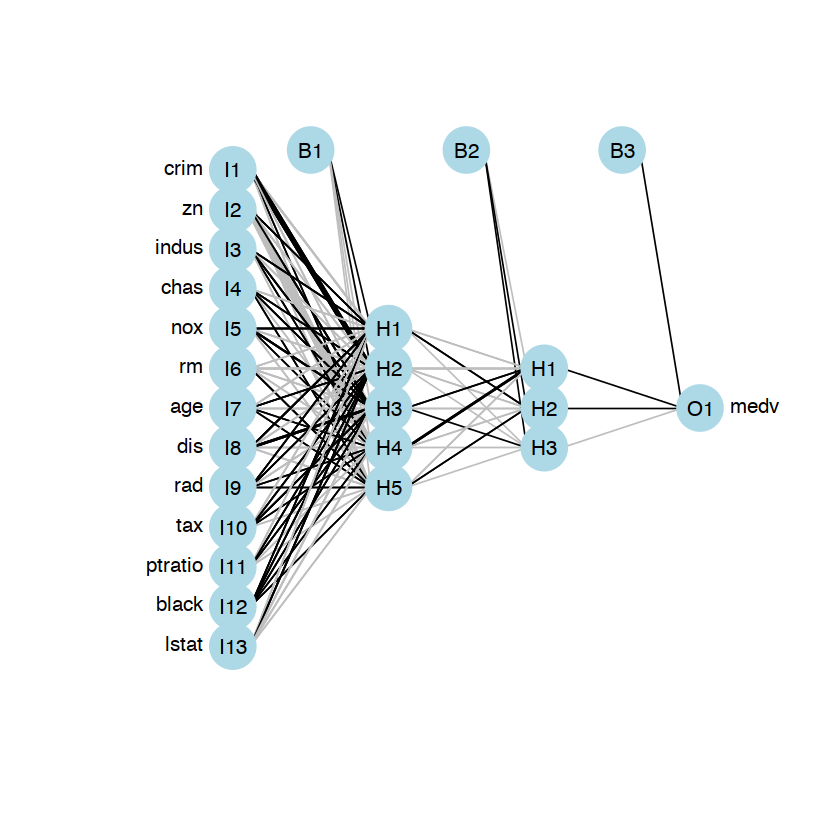

In [25]:
n <- names(train_)
f <- as.formula(paste("medv ~", paste(n[!n %in% "medv"], collapse = " + ")))
nn <- neuralnet(f, data=train_, hidden=c(5,3), linear.output=T)
plot.nnet(nn)


In [27]:
pr.nn <- compute(nn,test_[,1:13])

In [28]:
#scale back
pr.nn_ <- pr.nn$net.result*(max(data$medv)-min(data$medv))+min(data$medv)
test.r <- (test_$medv)*(max(data$medv)-min(data$medv))+min(data$medv)

MSE.nn <- sum((test.r - pr.nn_)^2)/nrow(test_)

#compare the two MSEs
print(paste(MSE.lm, MSE.nn))

[1] "31.2630222372615 16.4595537665717"
